<a href="https://colab.research.google.com/github/Chebem/Artfiical-Intelligence-/blob/main/Continuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Decision Tree Classification Visualization (Boundary and Regression Plot)**

**Load** dataset

In [1]:
# Install necessary libraries
%pip install pandas matplotlib seaborn plotly dash textblob scikit-learn tensorflow


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import dash
from dash import  dcc
from dash import html
from dash.dependencies import Input, Output


In [3]:
df = pd.read_csv('cleaned_amazon_review_with_sentiment_score.csv')

In [4]:
print(df.columns)
print(df.head())


Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs',
       'cleaned_reviews', 'Sentiment', 'review_length', 'word_count',
       'avg_word_length', 'sentiment_score'],
      dtype='object')
                     id             dateAdded           dateUpdated  \
0  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
1  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
2  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
3  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
4  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   

              

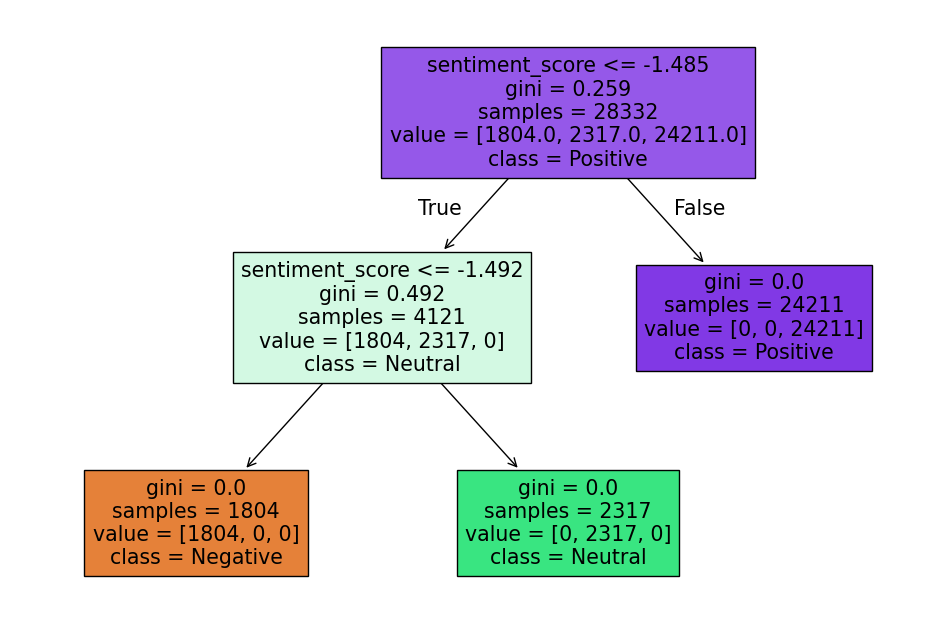

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import tree

X = df[['review_length', 'word_count', 'avg_word_length', 'sentiment_score', 'reviews.rating']]  # Select features
y = df['Sentiment']  # Target column (Sentiment)

# Decision Tree model
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)

# Perform cross-validation
cross_val_score(model, X, y, cv=5)

# Fit the model
model = model.fit(X, y)

# Generate class names dynamically based on the target
class_names = np.unique(y)

# Plot the tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model.named_steps['decisiontreeclassifier'], filled=True, feature_names=X.columns, class_names=class_names)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


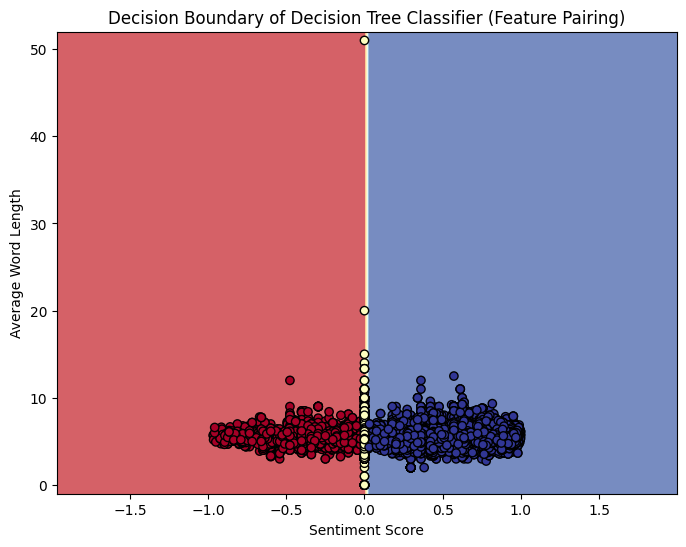

In [17]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Label encoding the target variable
le = LabelEncoder()
y = le.fit_transform(df['Sentiment'])  # Encode the target labels

# Select two numeric features for plotting
X = df[['sentiment_score', 'avg_word_length']]  # Select two features

# Create 2D decision boundary (for the selected features)
plt.figure(figsize=(8, 6))

# Train a DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Define grid for plotting the decision boundary
x_min, x_max = X['sentiment_score'].min() - 1, X['sentiment_score'].max() + 1
y_min, y_max = X['avg_word_length'].min() - 1, X['avg_word_length'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict the class labels for the decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X['sentiment_score'], X['avg_word_length'], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', marker='o')  # Plot the data points
plt.xlabel('Sentiment Score')
plt.ylabel('Average Word Length')
plt.title('Decision Boundary of Decision Tree Classifier (Feature Pairing)')
plt.show()


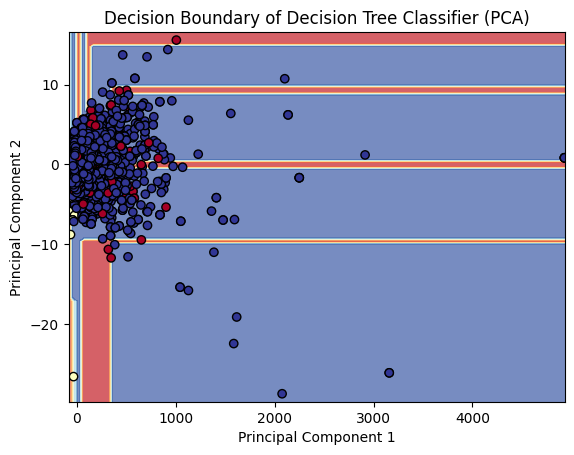

In [18]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Label encoding the target variable
le = LabelEncoder()
y = le.fit_transform(df['Sentiment'])  # Encode the target labels

# Select all numeric features for PCA
X = df[['sentiment_score', 'review_length', 'word_count', 'avg_word_length']]  # Example features

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train a DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_pca, y)

# Define grid for plotting the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict the class labels for the decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', marker='o')  # Plot the data points
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary of Decision Tree Classifier (PCA)')
plt.show()


# **Visualization using graphviz**

In [20]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Check the unique classes in your target variable (y)
print(np.unique(y))

# Define and fit the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)  # X: features, y: target variable

# Get the class names dynamically from the target variable
class_names = np.unique(y)

# Export the tree to DOT format
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(class_name) for class_name in class_names],
    filled=True,
    rounded=True,
    special_characters=True
)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph.view()


[0 1 2]


'decision_tree.pdf'

# **Hyperparameter**

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Instantiate the model
model = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Best parameters from the grid search
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


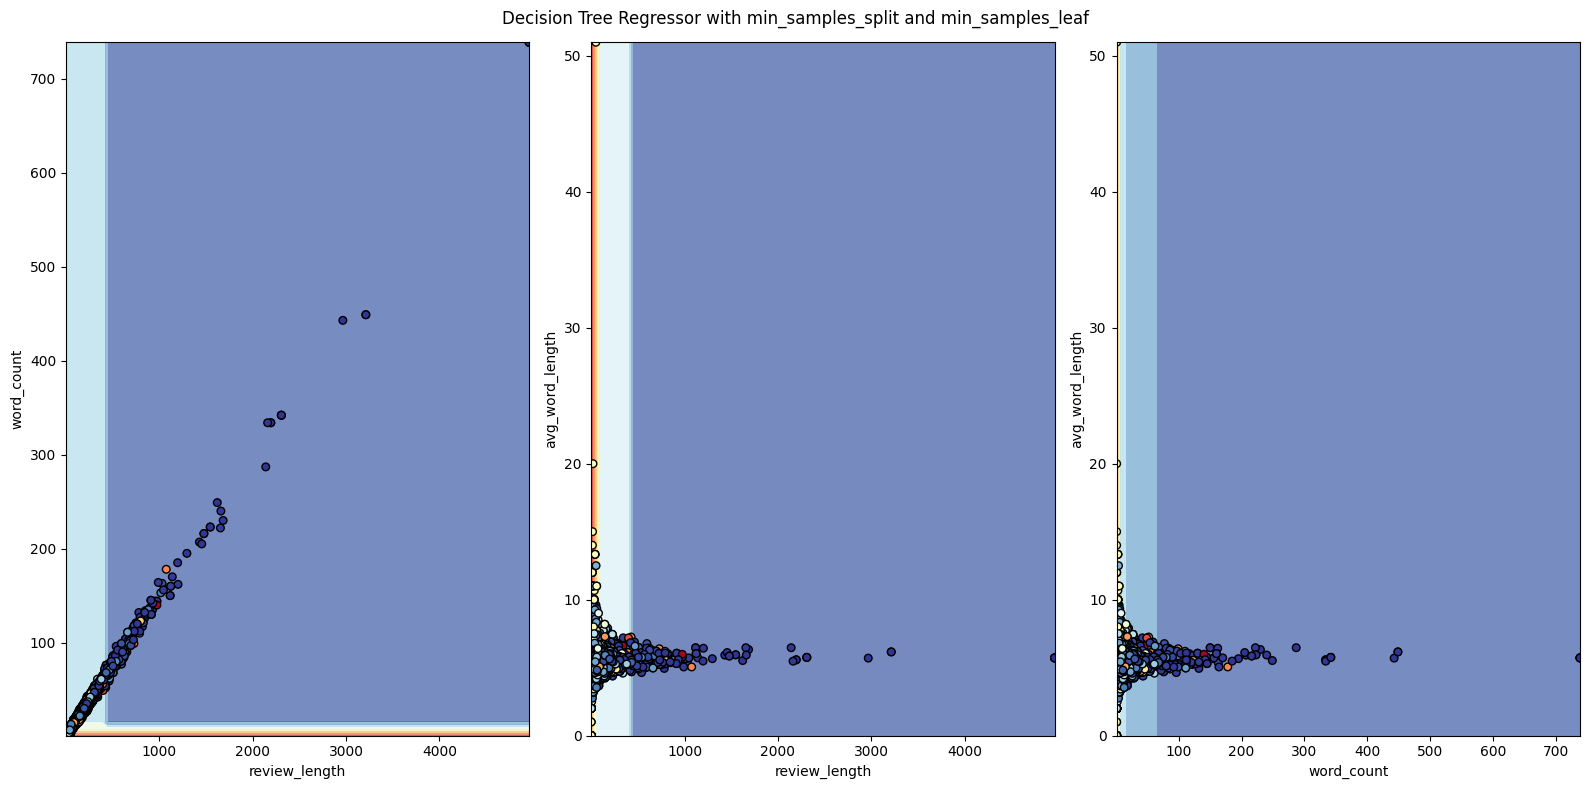

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import numpy as np


X = df[['review_length', 'word_count', 'avg_word_length']]
y = df['sentiment_score']  # Target (sentiment score)

# Create 2D decision boundary (for pairs of features)
plt.figure(figsize=(16, 8))

# Loop through each pair of features
for pairidx, pair in enumerate([[0, 1], [0, 2], [1, 2]]):  # Feature pairs
    # Select the features for the current pair
    X_pair = X.iloc[:, pair].values

    # Train a DecisionTreeRegressor model
    model = DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=4, max_depth=3)
    model.fit(X_pair, y)  # Fit the model with the selected pair of features

    # Create a range of values for the features to visualize the decision boundary
    X_test = np.meshgrid(np.linspace(X_pair[:, 0].min(), X_pair[:, 0].max(), 100),
                        np.linspace(X_pair[:, 1].min(), X_pair[:, 1].max(), 100))  # 2D grid for prediction

    # Predict the target values using the trained model for the entire grid
    Z = model.predict(np.c_[X_test[0].ravel(), X_test[1].ravel()])
    Z = Z.reshape(X_test[0].shape)

    # Plot the results
    plt.subplot(1, 3, pairidx + 1)
    plt.contourf(X_test[0], X_test[1], Z, cmap=plt.cm.RdYlBu, alpha=0.7)  # Decision boundary
    plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y, cmap=plt.cm.RdYlBu, s=30, edgecolor='k', marker='o')  # Data points
    plt.xlabel(X.columns[pair[0]])  # Feature names for the x-axis
    plt.ylabel(X.columns[pair[1]])  # Feature names for the y-axis

plt.suptitle("Decision Tree Regressor with min_samples_split and min_samples_leaf")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Raw Data Mean Cross-Validation Score: 0.9641 (+/- 0.0015)
NMF Data Mean Cross-Validation Score: 0.9448 (+/- 0.0010)
Best Hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


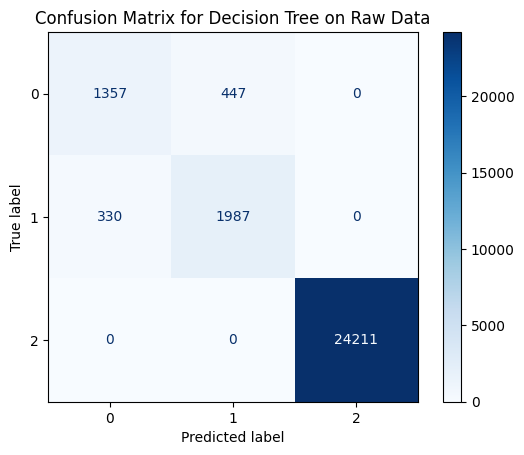

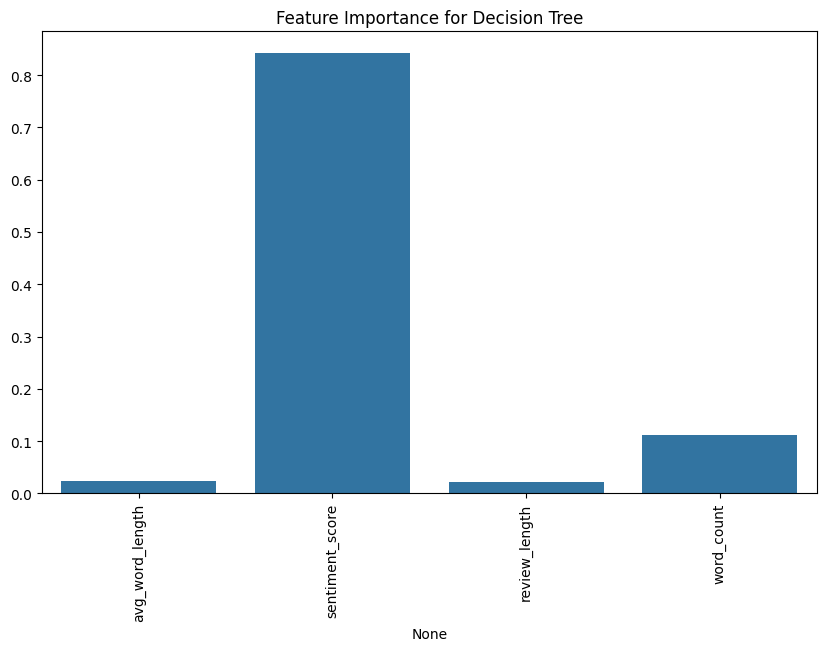

Random Forest - Raw Data Mean Cross-Validation Score: 0.9643 (+/- 0.0015)
Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


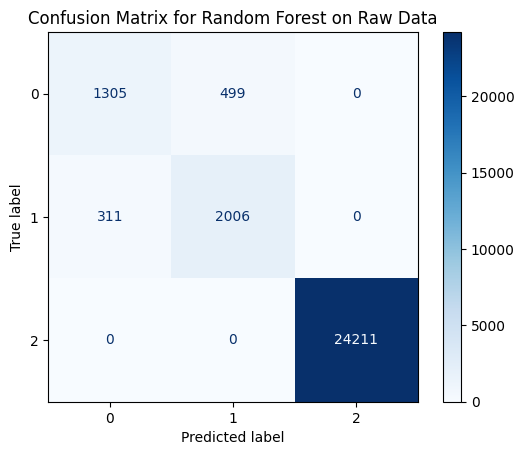

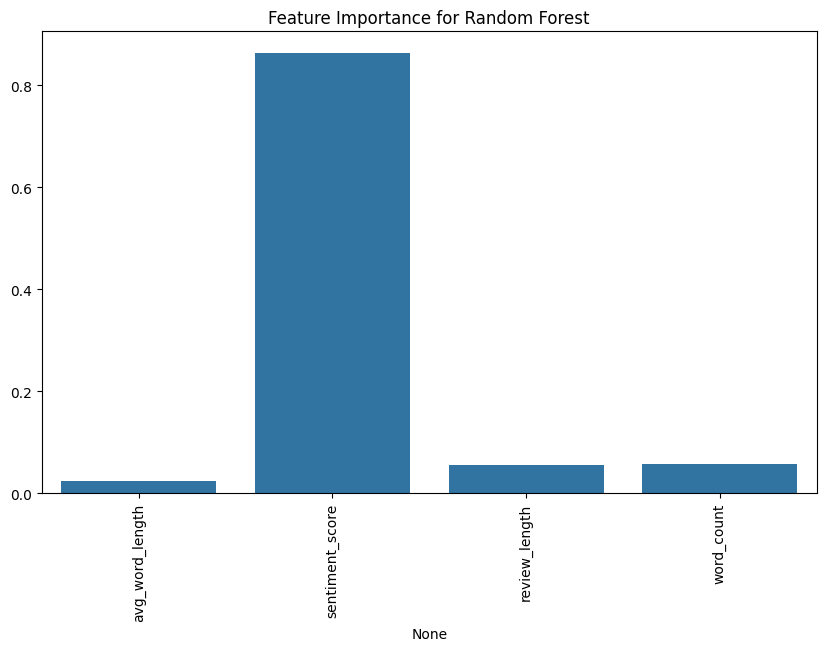

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Preprocess your dataset (for example, extracting features and labels)
X = df[['avg_word_length', 'sentiment_score', 'review_length', 'word_count']]  # Selecting relevant columns for X
y = df['Sentiment']


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_clipped = X.clip(lower=0)

# Apply NMF for dimensionality reduction
nmf = NMF(n_components=3, random_state=0)
nmf.fit(X_clipped)
decomposed_X = nmf.transform(X_clipped)

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=0)

# Cross-validation with Decision Tree on raw data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
score_raw = cross_val_score(
    estimator=decision_tree,
    X=X_clipped, y=y_encoded,
    cv=cv,
    scoring='accuracy'
)
print(f'Raw Data Mean Cross-Validation Score: {score_raw.mean():.4f} (+/- {score_raw.std():.4f})')

# Cross-validation with Decision Tree on NMF-decomposed data
score_decomposed = cross_val_score(
    estimator=decision_tree,
    X=decomposed_X, y=y_encoded,
    cv=cv,
    scoring='accuracy'
)
print(f'NMF Data Mean Cross-Validation Score: {score_decomposed.mean():.4f} (+/- {score_decomposed.std():.4f})')

# Hyperparameter tuning using GridSearchCV for Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_clipped, y_encoded)

# Best hyperparameters for Decision Tree
print("Best Hyperparameters for Decision Tree:", grid_search.best_params_)

# Confusion Matrix for Decision Tree on raw data
y_pred = grid_search.predict(X_clipped)
cm = confusion_matrix(y_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree on Raw Data')
plt.show()

# Feature Importance visualization for Decision Tree
plt.figure(figsize=(10, 6))
sns.barplot(x=X_clipped.columns, y=grid_search.best_estimator_.feature_importances_)
plt.title('Feature Importance for Decision Tree')
plt.xticks(rotation=90)
plt.show()

# RandomForestClassifier for comparison
random_forest = RandomForestClassifier(random_state=0)

# Cross-validation with Random Forest on raw data
score_raw_rf = cross_val_score(
    estimator=random_forest,
    X=X_clipped, y=y_encoded,
    cv=cv,
    scoring='accuracy'
)
print(f'Random Forest - Raw Data Mean Cross-Validation Score: {score_raw_rf.mean():.4f} (+/- {score_raw_rf.std():.4f})')

# Hyperparameter tuning using GridSearchCV for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=cv, scoring='accuracy')
grid_search_rf.fit(X_clipped, y_encoded)

# Best hyperparameters for Random Forest
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)

# Confusion Matrix for Random Forest on raw data
y_pred_rf = grid_search_rf.predict(X_clipped)
cm_rf = confusion_matrix(y_encoded, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest on Raw Data')
plt.show()

# Feature Importance visualization for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=X_clipped.columns, y=grid_search_rf.best_estimator_.feature_importances_)
plt.title('Feature Importance for Random Forest')
plt.xticks(rotation=90)
plt.show()


Classification Data Shapes - X_train: (22665, 19), X_test: (5667, 19), y_train: (22665,), y_test: (5667,)
Iteration 1, loss = 0.10258843
Iteration 2, loss = 0.03302007
Iteration 3, loss = 0.02590585
Iteration 4, loss = 0.02576713
Iteration 5, loss = 0.02010589
Iteration 6, loss = 0.01785621
Iteration 7, loss = 0.01593966
Iteration 8, loss = 0.01411223
Iteration 9, loss = 0.01278719
Iteration 10, loss = 0.01127710
Iteration 11, loss = 0.01021154
Iteration 12, loss = 0.00949262
Iteration 13, loss = 0.00852656
Iteration 14, loss = 0.00777554
Iteration 15, loss = 0.00696952
Iteration 16, loss = 0.00640376
Iteration 17, loss = 0.00598528
Iteration 18, loss = 0.00538011
Iteration 19, loss = 0.00500967
Iteration 20, loss = 0.00428398
Iteration 21, loss = 0.00406714
Iteration 22, loss = 0.00488109
Iteration 23, loss = 0.00362776
Iteration 24, loss = 0.00330885
Iteration 25, loss = 0.00321482
Iteration 26, loss = 0.00280420
Iteration 27, loss = 0.00261709
Iteration 28, loss = 0.00257745
Iterati

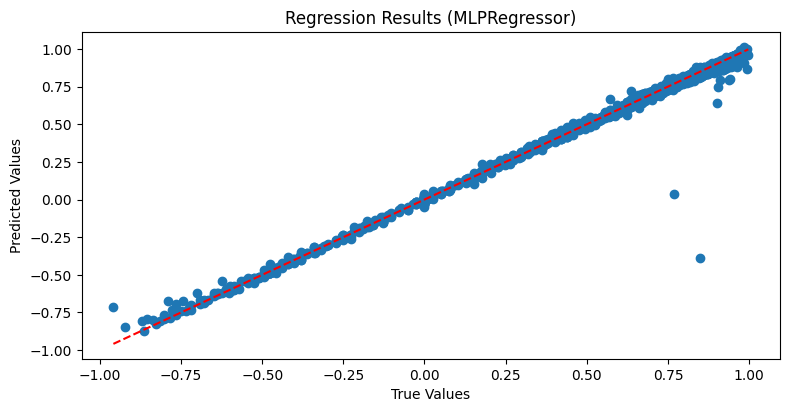

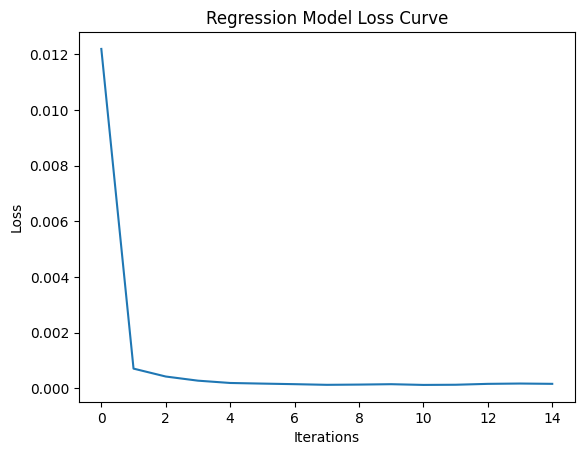

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report
import matplotlib.pyplot as plt


target_column_classification = 'Sentiment'  # Classification target
target_column_regression = 'sentiment_score'  # Regression target
drop_columns = ['id', 'dateAdded', 'dateUpdated', 'reviews.text', 'reviews.username', 'reviews.date', 'reviews.dateSeen', 'reviews.sourceURLs', 'reviews.title', 'reviews.id', 'reviews.sourceURLs']  # Drop unnecessary columns

# Features (X) and targets (y) for classification and regression
X = df.drop([target_column_classification] + drop_columns, axis=1)  # Features for classification
y_classification = df[target_column_classification]  # Classification target
y_regression = df[target_column_regression]  # Regression target

# Encode the classification target variable (Sentiment) to integers for classification
label_encoder = LabelEncoder()
y_classification = label_encoder.fit_transform(y_classification)

# Separate numerical and categorical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Impute missing values in numerical columns with the mean
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numerical values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

# Impute missing values in categorical columns with the most frequent value
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine both transformations for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_columns),  # Process numerical columns
        ('cat', categorical_preprocessor, categorical_columns)  # Process categorical columns
    ]
)

# Train-test split for classification
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_classification, test_size=0.2, random_state=42)
print(f"Classification Data Shapes - X_train: {X_train_c.shape}, X_test: {X_test_c.shape}, y_train: {y_train_c.shape}, y_test: {y_test_c.shape}")

# Classification with MLPClassifier
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(40,),  # Number of neurons in each hidden layer
    max_iter=200,  # Maximum number of iterations
    alpha=1e-4,  # Regularization strength
    solver="sgd",  # Optimizer
    verbose=10,  # Output detailed progress
    random_state=1,
    learning_rate_init=0.1,  # Initial learning rate
)

# Use the pipeline for preprocessing and training
pipeline_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', mlp_classifier)
])

pipeline_classifier.fit(X_train_c, y_train_c)
print('Classification Training Score:', pipeline_classifier.score(X_train_c, y_train_c))
print('Classification Test Score:', pipeline_classifier.score(X_test_c, y_test_c))
print('\nClassification Report:')
print(classification_report(y_test_c, pipeline_classifier.predict(X_test_c)))

# Train-test split for regression
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_regression, test_size=0.1, random_state=42)

# Regression with MLPRegressor
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(100, 50),  # Number of neurons in hidden layers
    max_iter=2000,  # Maximum number of iterations
    random_state=42,
)
pipeline_regressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', mlp_regressor)
])

pipeline_regressor.fit(X_train_r, y_train_r)

# Predictions and evaluation for regression
y_pred_r = pipeline_regressor.predict(X_test_r)
mse = mean_squared_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

print("\nRegression Results:")
print("MSE:", mse)
print("R2 Score:", r2)

# Plot regression results
plt.figure(figsize=(8, 4))
plt.scatter(y_test_r, y_pred_r)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], '--r')  # Diagonal line for comparison
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.title('Regression Results (MLPRegressor)')
plt.show()

# Plot the loss curve for regression
plt.plot(mlp_regressor.loss_curve_)
plt.title('Regression Model Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


# **OUT OF BAG**

In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Drop irrelevant columns and ensure features are numerical
X = df.drop(['Sentiment', 'id', 'dateAdded', 'dateUpdated', 'reviews.text', 'reviews.username', 'reviews.date', 'reviews.dateSeen', 'reviews.sourceURLs', 'reviews.title', 'reviews.id'], axis=1)  # Remove irrelevant columns
y = df['Sentiment']  # The target column 'Sentiment'

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Define a preprocessor that handles categorical and numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Define a pipeline that first preprocesses the data and then applies the RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(oob_score=True, random_state=0))
])

# Train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate on the test set for comparison
test_score = pipeline.score(X_test, y_test)
print(f'Test Score: {test_score}')

# Print the OOB score (Out-of-Bag score)
random_forest_oob = pipeline.named_steps['classifier']
print(f'OOB Score: {random_forest_oob.oob_score_}')


Test Score: 0.9950591141697547
OOB Score: 0.9951025810721377


# **t-SNE**

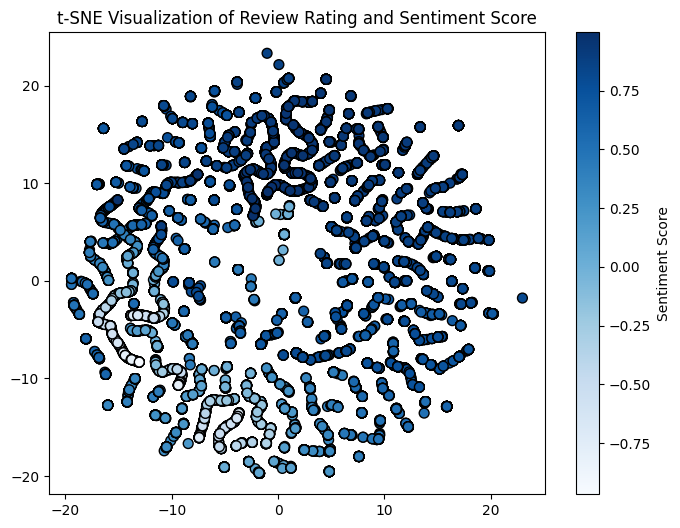

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is called `df`

# Select only relevant columns (review_rating and sentiment_score)
target_column = 'sentiment_score'  # Replace with your target column name (sentiment_score)
drop_columns = ['id', 'dateAdded', 'dateUpdated', 'reviews.text', 'reviews.username', 'reviews.date', 'reviews.dateSeen', 'reviews.sourceURLs', 'reviews.title', 'reviews.id']

# Prepare the feature matrix (X) and target vector (y)
X = df[['reviews.rating', target_column]]  # Select only review_rating and sentiment_score
y = df[target_column]  # The target column 'sentiment_score'

# Impute missing values with the mean (optional step if data contains missing values)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Apply t-SNE to the processed data
t_sne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300)
X_t_sne = t_sne.fit_transform(X_imputed)

# Plot the t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(X_t_sne[:, 0], X_t_sne[:, 1], c=y, cmap='Blues', edgecolors='k', s=50)  # Use 'Blues' colormap for numerical values
plt.colorbar(label='Sentiment Score')  # Color bar for the sentiment score
plt.title('t-SNE Visualization of Review Rating and Sentiment Score')
plt.show()


# **Isomap**

# **MDS (Multidimensional Scaling):**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 8 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages

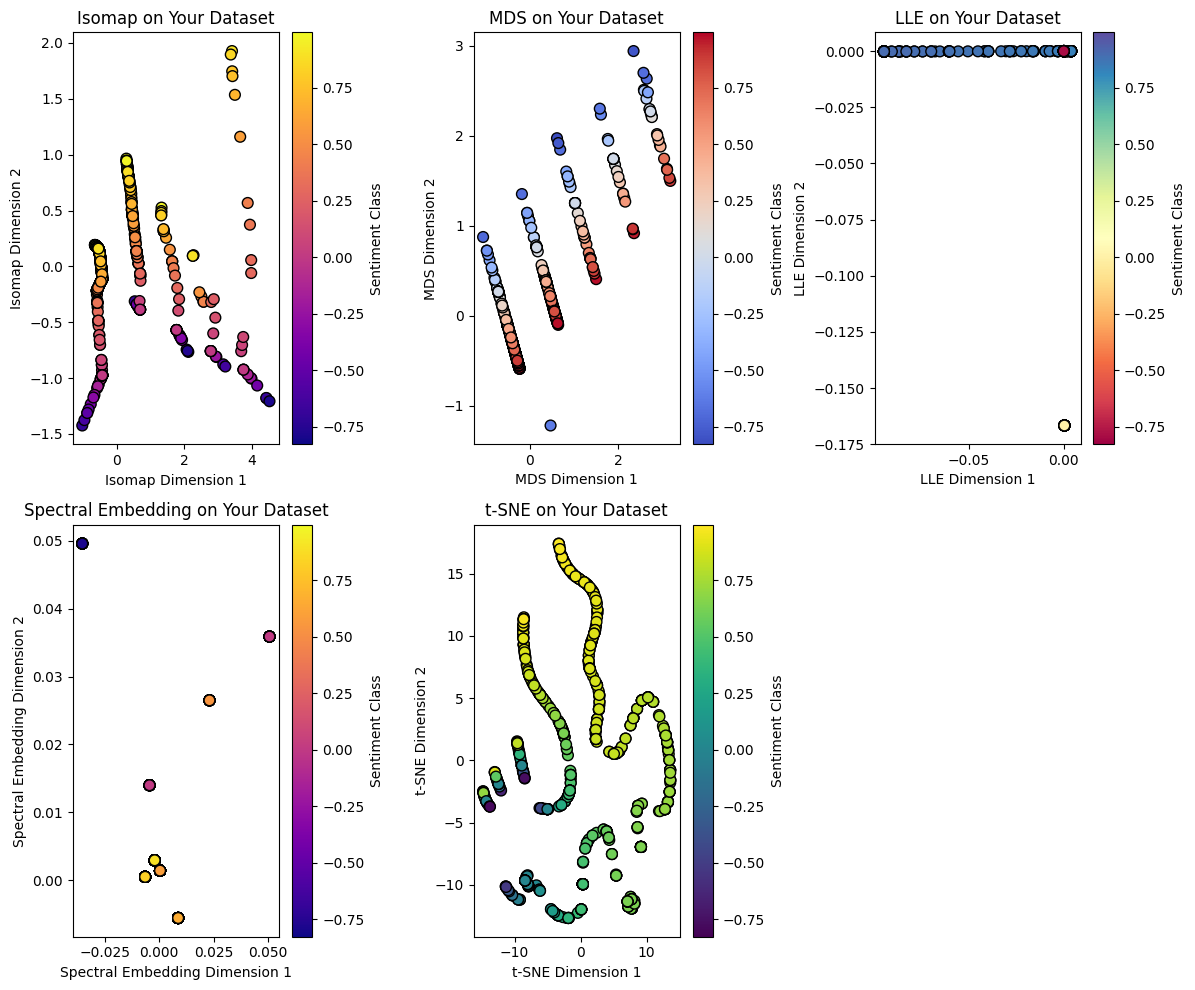

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS, LocallyLinearEmbedding, SpectralEmbedding, Isomap
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import pandas as pd

# Sample 1000 rows from the DataFrame
df_sample = df.sample(n=1000, random_state=42)  # Subset of 1000 rows

# Select relevant columns
target_column = 'sentiment_score'  # The target column (sentiment_score)
drop_columns = ['id', 'dateAdded', 'dateUpdated', 'reviews.text', 'reviews.username', 'reviews.date', 'reviews.dateSeen', 'reviews.sourceURLs', 'reviews.title', 'reviews.id']  # Columns to drop

# Prepare the feature matrix (X) and target vector (y)
X = df_sample[['reviews.rating', target_column]]  # Select only review_rating and sentiment_score
y = df_sample[target_column]  # Target column 'sentiment_score'

# Impute missing values with the mean (optional step if data contains missing values)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 1. Apply Isomap for dimensionality reduction
isomap = Isomap(n_neighbors=10, n_components=2)
X_isomap = isomap.fit_transform(X_train)

# Plot the Isomap result
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)  # First plot
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y_train, cmap='plasma', edgecolor='k', s=60)
plt.title('Isomap on Your Dataset', fontsize=12)
plt.xlabel("Isomap Dimension 1")
plt.ylabel("Isomap Dimension 2")
plt.colorbar(label="Sentiment Class")

# 2. Apply MDS for dimensionality reduction
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_train)

# Plot the MDS result
plt.subplot(2, 3, 2)  # Second plot
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=60)
plt.title('MDS on Your Dataset', fontsize=12)
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.colorbar(label="Sentiment Class")

# 3. Apply Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
X_lle = lle.fit_transform(X_train)

# Plot the LLE result
plt.subplot(2, 3, 3)  # Third plot
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_train, cmap='Spectral', edgecolor='k', s=60)
plt.title('LLE on Your Dataset', fontsize=12)
plt.xlabel("LLE Dimension 1")
plt.ylabel("LLE Dimension 2")
plt.colorbar(label="Sentiment Class")

# 4. Apply Spectral Embedding
spectral = SpectralEmbedding(n_components=2, n_neighbors=10)
X_spectral = spectral.fit_transform(X_train)

# Plot the Spectral Embedding result
plt.subplot(2, 3, 4)  # Fourth plot
plt.scatter(X_spectral[:, 0], X_spectral[:, 1], c=y_train, cmap='plasma', edgecolor='k', s=60)
plt.title('Spectral Embedding on Your Dataset', fontsize=12)
plt.xlabel("Spectral Embedding Dimension 1")
plt.ylabel("Spectral Embedding Dimension 2")
plt.colorbar(label="Sentiment Class")

# 5. Apply t-SNE for comparison
t_sne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300)
X_t_sne = t_sne.fit_transform(X_train)

# Plot the t-SNE result
plt.subplot(2, 3, 5)  # Fifth plot
plt.scatter(X_t_sne[:, 0], X_t_sne[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=60)
plt.title('t-SNE on Your Dataset', fontsize=12)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Sentiment Class")

# Show all the plots
plt.tight_layout()
plt.show()


#**RECOMMENDATION**

In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your dataset is loaded as 'df'

# Select a random sample of 1000 rows from the dataset
df_sample = df.sample(n=1000, random_state=42)  # Adjust the random state for reproducibility

# Extract the relevant columns: user IDs and their ratings
user_ratings = df_sample.groupby('reviews.username')['reviews.rating'].apply(list).to_dict()

# Create a matrix where rows represent users and columns represent products
product_names = df_sample['name'].unique()
user_list = list(user_ratings.keys())
rating_matrix = np.zeros((len(user_list), len(product_names)))

# Fill the rating matrix
for i, user in enumerate(user_list):
    for j, product in enumerate(product_names):
        product_ratings = df_sample[(df_sample['reviews.username'] == user) & (df_sample['name'] == product)]['reviews.rating']
        if not product_ratings.empty:
            rating_matrix[i][j] = product_ratings.iloc[0]  # Take the rating if exists

# Compute cosine similarity between users based on their ratings
similarity_matrix = cosine_similarity(rating_matrix)

# Create a matrix based on the product features: 'brand', 'categories', 'primaryCategories'
# Combine 'brand', 'categories', and 'primaryCategories' into a single column for each product
df_sample['combined_features'] = df_sample['brand'].fillna('') + ' ' + df_sample['categories'].fillna('') + ' ' + df_sample['primaryCategories'].fillna('')

# Vectorize the combined features using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
feature_matrix = vectorizer.fit_transform(df_sample['combined_features'])

# Compute cosine similarity based on product features
feature_similarity_matrix = cosine_similarity(feature_matrix)

# Choose a user (e.g., the first user in the list)
user_id = 0  # index of the user you want to recommend products for
best_match_id = np.argmax(similarity_matrix[user_id])

# Recommend products based on the best match's ratings
recommend_list = []
for i, (my_rating, best_match_rating) in enumerate(zip(rating_matrix[user_id], rating_matrix[best_match_id])):
    if my_rating == 0 and best_match_rating > 0:  # Recommend unwatched products where the best match has rated
        # Calculate product similarity using both rating and feature-based similarity
        feature_sim = feature_similarity_matrix[i][i]  # Feature similarity of the product
        total_score = best_match_rating * feature_sim  # Combine feature similarity and rating
        recommend_list.append((i, total_score))  # Add product index with combined score

# Sort the recommendation list based on the combined score (higher score first)
sorted_recommendations = sorted(recommend_list, key=lambda x: x[1], reverse=True)

# Extract product indices
sorted_product_indices = [product[0] for product in sorted_recommendations]

# Map the indices back to product names
sorted_product_names = [product_names[i] for i in sorted_product_indices]

# Print recommended products
print("Recommended products:", sorted_product_names)


Recommended products: []


In [17]:
import numpy as np
import pandas as pd

# Assuming your dataset is loaded as 'df'

# Preprocessing the sentiment column to convert it to numeric values
# Assuming the sentiment column has values like 'positive', 'negative', 'neutral'
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
df['sentiment_score'] = df['Sentiment'].map(sentiment_mapping)

# Handle missing values for 'manufacturer'
df['manufacturer'].fillna('Unknown', inplace=True)  # Fill NaN values with 'Unknown' for manufacturer

# We will now combine the review rating, sentiment score, and manufacturer into a combined score
# One possible way is to take a weighted average of sentiment, rating, and manufacturer (as a categorical feature)
# Example: 0.4 weight for sentiment, 0.4 for review rating, and 0.2 for manufacturer (as a feature)

# Use a basic encoding for the manufacturer column (e.g., counting unique manufacturers)
df['manufacturer_score'] = df.groupby('manufacturer')['manufacturer'].transform('count')

# Create a combined score by using weights for each feature
df['combined_score'] = 0.4 * df['reviews.rating'] + 0.4 * df['sentiment_score'] + 0.2 * df['manufacturer_score']

# Create a dictionary of product reviews for each product (by 'name')
product_reviews = df.groupby('name').agg({
    'reviews.rating': 'mean',
    'combined_score': 'mean',
    'manufacturer_score': 'mean'
}).reset_index()

# Sort the products by the combined score (higher combined score first)
sorted_products = product_reviews.sort_values(by='combined_score', ascending=False)

# Get the top recommended products based on combined score
top_recommended_products = sorted_products.head(10)  # Top 10 recommended products

# Output the recommended products
print("Top 10 Recommended Products based on Sentiment, Review Rating, and Manufacturer:")
print(top_recommended_products[['name', 'reviews.rating', 'combined_score', 'manufacturer_score']])


Top 10 Recommended Products based on Sentiment, Review Rating, and Manufacturer:
                                                name  reviews.rating  \
0  All-New Fire 7 Tablet with Alexa, 7" Display, ...        4.585366   
1  All-New Fire HD 8 Kids Edition Tablet, 8 HD Di...        4.630901   
2  All-New Fire HD 8 Kids Edition Tablet, 8 HD Di...        4.641638   
3  All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...        4.578709   
4  All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...        4.600000   
5  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...        4.584388   
6  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...        4.522388   
7  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...        4.542857   
8  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...        4.583333   
9  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...        4.565217   

   combined_score  manufacturer_score  
0             NaN             16130.0  
1             NaN             16130.0  
2     

# **Euclidean Distance-based User Matching**

In [21]:
import numpy as np
import pandas as pd

# Assuming your dataset is loaded as 'df'

# Step 1: Select a random sample of 1000 rows from the dataset
df_sample = df.sample(n=1000, random_state=42)  # Adjust the random state for reproducibility

# Step 2: Create a user-item rating matrix (user ratings for each product) from the sample
user_ratings = df_sample.groupby('reviews.username').apply(
    lambda x: x.set_index('name')['reviews.rating'].to_dict()
).to_dict()

# Get all unique product names for the columns
product_names = df_sample['name'].unique()

# Create a matrix where rows represent users and columns represent products
rating_matrix = np.zeros((len(user_ratings), len(product_names)))

# Map user names to indices
user_to_idx = {user: idx for idx, user in enumerate(user_ratings.keys())}

# Populate the rating matrix with ratings for each user and product
for user, ratings in user_ratings.items():
    for product, rating in ratings.items():
        user_idx = user_to_idx[user]
        product_idx = np.where(product_names == product)[0][0]
        rating_matrix[user_idx, product_idx] = rating

# Step 3: Normalize the user vectors (ratings) for better distance computation
def normalize_vector(vector):
    norm = np.linalg.norm(vector)
    if norm != 0:
        return vector / norm
    return vector

# Step 4: Find the best match using Euclidean distance
my_id = 0  # Example user ID (could be dynamic or based on user selection)
my_vector = rating_matrix[my_id]
my_vector = normalize_vector(my_vector)

# Initialize variables for the best match
best_match = np.inf  # Start with a large value
best_match_id = -1

# Calculate Euclidean distance between the target user and all other users
for user_id, user_vector in enumerate(rating_matrix):
    if my_id != user_id:
        user_vector = normalize_vector(user_vector)
        euclidean_dist = np.linalg.norm(my_vector - user_vector)

        # Update best match if a better (closer) user is found
        if euclidean_dist < best_match:
            best_match = euclidean_dist
            best_match_id = user_id

print(f'Best Match: {best_match}, Best Match ID: {best_match_id}')


Best Match: 0.0, Best Match ID: 18


# **Cosine Similarity based User Matching**

In [22]:
import numpy as np
import pandas as pd

# Assuming your dataset is loaded as 'df'

# Step 1: Select a random sample of 1000 rows from the dataset
df_sample = df.sample(n=1000, random_state=42)  # Adjust the random state for reproducibility

# Step 2: Create a user-item rating matrix (user ratings for each product) from the sample
user_ratings = df_sample.groupby('reviews.username').apply(
    lambda x: x.set_index('name')['reviews.rating'].to_dict()
).to_dict()

# Get all unique product names for the columns
product_names = df_sample['name'].unique()

# Create a matrix where rows represent users and columns represent products
rating_matrix = np.zeros((len(user_ratings), len(product_names)))

# Map user names to indices
user_to_idx = {user: idx for idx, user in enumerate(user_ratings.keys())}

# Populate the rating matrix with ratings for each user and product
for user, ratings in user_ratings.items():
    for product, rating in ratings.items():
        user_idx = user_to_idx[user]
        product_idx = np.where(product_names == product)[0][0]
        rating_matrix[user_idx, product_idx] = rating

# Step 3: Normalize the user vectors (ratings) for better distance computation
def normalize_vector(vector):
    norm = np.linalg.norm(vector)
    if norm != 0:
        return vector / norm
    return vector

# Step 4: Compute Cosine Similarity between two vectors
def compute_cos_similarity(v1, v2):
    norm1 = np.linalg.norm(v1)
    norm2 = np.linalg.norm(v2)
    if norm1 == 0 or norm2 == 0:
        return 0  # Avoid division by zero
    dot = np.dot(v1, v2)
    return dot / (norm1 * norm2)

# Step 5: Find the best match using Cosine Similarity
my_id = 0  # Example user ID (could be dynamic or based on user selection)
my_vector = rating_matrix[my_id]
my_vector = normalize_vector(my_vector)

# Initialize variables for the best match
best_match = -1  # Start with a low similarity score
best_match_id = -1

# Compute cosine similarity and find the best match
for user_id, user_vector in enumerate(rating_matrix):
    if my_id != user_id:
        cos_similarity = compute_cos_similarity(my_vector, user_vector)

        if cos_similarity > best_match:
            best_match = cos_similarity
            best_match_id = user_id

print(f'Best Match: {best_match}, Best Match ID: {best_match_id}')


Best Match: 1.0, Best Match ID: 18


In [24]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your dataset is loaded as 'df'

# Step 1: Select a random sample of 1000 rows from the dataset
df_sample = df.sample(n=1000, random_state=42)  # Adjust the random state for reproducibility

# Step 2: Create a user-item rating matrix (user ratings for each product) from the sample
user_ratings = df_sample.groupby('reviews.username').apply(
    lambda x: x.set_index('name')['reviews.rating'].to_dict()
).to_dict()

# Get all unique product names for the columns
product_names = df_sample['name'].unique()

# Create a matrix where rows represent users and columns represent products
rating_matrix = np.zeros((len(user_ratings), len(product_names)))

# Map user names to indices
user_to_idx = {user: idx for idx, user in enumerate(user_ratings.keys())}

# Populate the rating matrix with ratings for each user and product
for user, ratings in user_ratings.items():
    for product, rating in ratings.items():
        user_idx = user_to_idx[user]
        product_idx = np.where(product_names == product)[0][0]
        rating_matrix[user_idx, product_idx] = rating

# Step 3: Normalize the user vectors (ratings) for better distance computation
def normalize_vector(vector):
    norm = np.linalg.norm(vector)
    if norm != 0:
        return vector / norm
    return vector

# Step 4: Compute Cosine Similarity between two vectors
def compute_cos_similarity(v1, v2):
    norm1 = np.linalg.norm(v1)
    norm2 = np.linalg.norm(v2)
    if norm1 == 0 or norm2 == 0:
        return 0  # Avoid division by zero
    dot = np.dot(v1, v2)
    return dot / (norm1 * norm2)

# Step 5: Create a product-feature matrix for brand and manufacturer
# Combine brand and manufacturer into a single text column for each product
df_sample['combined_features'] = df_sample['brand'].fillna('') + ' ' + df_sample['manufacturer'].fillna('')

# Use CountVectorizer to vectorize the product features (brand and manufacturer)
vectorizer = CountVectorizer(stop_words='english')
feature_matrix = vectorizer.fit_transform(df_sample['combined_features'])

# Step 6: Compute cosine similarity between product features
feature_similarity_matrix = cosine_similarity(feature_matrix)

# Step 7: Find the best match using Cosine Similarity for both ratings and product features
my_id = 0  # Example user ID (could be dynamic or based on user selection)
my_vector = rating_matrix[my_id]
my_vector = normalize_vector(my_vector)

# Initialize variables for the best match
best_match = -1  # Start with a low similarity score
best_match_id = -1

# Compute cosine similarity for ratings and product features, then combine them
for user_id, user_vector in enumerate(rating_matrix):
    if my_id != user_id:
        # Cosine similarity based on user ratings
        cos_similarity_ratings = compute_cos_similarity(my_vector, user_vector)

        # Get the feature similarity for the best match product (taking the same product index)
        product_idx = np.argmax(user_vector)  # The product that the current user rated most
        cos_similarity_features = feature_similarity_matrix[product_idx][product_idx]

        # Combine ratings and feature similarity
        combined_similarity = 0.7 * cos_similarity_ratings + 0.3 * cos_similarity_features  # Weigh ratings higher

        # Update the best match if a better similarity score is found
        if combined_similarity > best_match:
            best_match = combined_similarity
            best_match_id = user_id

print(f'Best Match: {best_match}, Best Match ID: {best_match_id}')


Best Match: 1.0, Best Match ID: 18


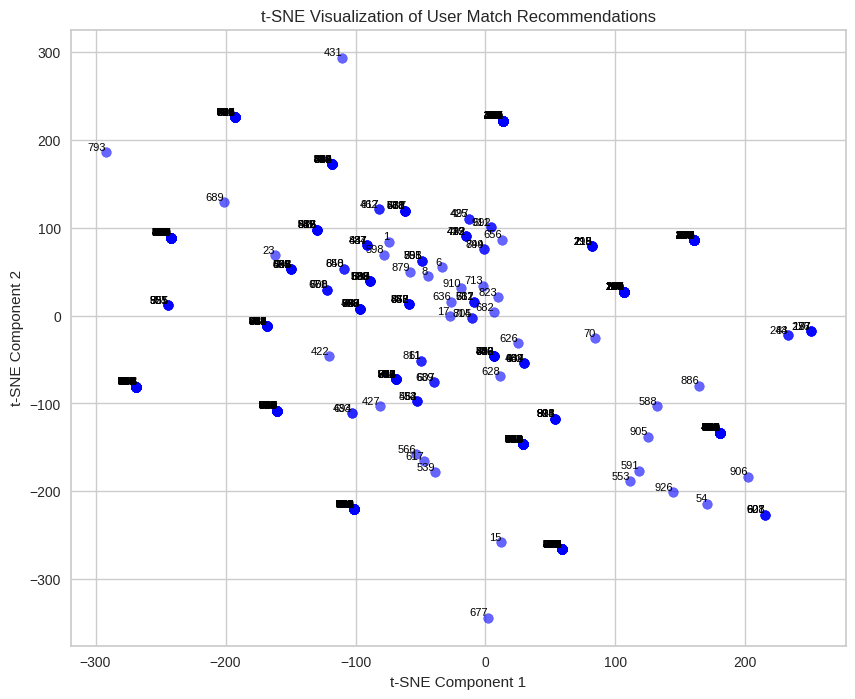

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Assuming your dataset is loaded as 'df'

# Step 1: Select a random sample of 1000 rows from the dataset
df_sample = df.sample(n=1000, random_state=42)  # Adjust the random state for reproducibility

# Step 2: Create a user-item rating matrix (user ratings for each product) from the sample
user_ratings = df_sample.groupby('reviews.username').apply(
    lambda x: x.set_index('name')['reviews.rating'].to_dict()
).to_dict()

# Get all unique product names for the columns
product_names = df_sample['name'].unique()

# Create a matrix where rows represent users and columns represent products
rating_matrix = np.zeros((len(user_ratings), len(product_names)))

# Map user names to indices
user_to_idx = {user: idx for idx, user in enumerate(user_ratings.keys())}

# Populate the rating matrix with ratings for each user and product
for user, ratings in user_ratings.items():
    for product, rating in ratings.items():
        user_idx = user_to_idx[user]
        product_idx = np.where(product_names == product)[0][0]
        rating_matrix[user_idx, product_idx] = rating

# Step 3: Normalize the user vectors (ratings) for better distance computation
def normalize_vector(vector):
    norm = np.linalg.norm(vector)
    if norm != 0:
        return vector / norm
    return vector

# Normalize all user vectors in the rating matrix
normalized_rating_matrix = np.array([normalize_vector(user_vector) for user_vector in rating_matrix])

# Step 4: Compute Cosine Similarity between users (for plotting recommendations)
cos_similarity_matrix = cosine_similarity(normalized_rating_matrix)

# Step 5: Reduce dimensions for visualization (using t-SNE)
tsne = TSNE(n_components=2, random_state=42)
reduced_dimensions = tsne.fit_transform(cos_similarity_matrix)

# Step 6: Plot the recommendations based on cosine similarity
plt.figure(figsize=(10, 8))

# Scatter plot of the users in the reduced 2D space
plt.scatter(reduced_dimensions[:, 0], reduced_dimensions[:, 1], c='blue', label='Users', alpha=0.6)

# Annotating the points with user indices (for clarity, can be changed to actual user names)
for i, (x, y) in enumerate(reduced_dimensions):
    plt.text(x, y, str(i), color='black', fontsize=8, ha='right', va='bottom')

# Add labels and title
plt.title('t-SNE Visualization of User Match Recommendations')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Show the plot
plt.show()


In [23]:
import numpy as np
import pandas as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming your dataset is loaded as 'df'

# Select relevant columns
target_column = 'Sentiment'  # Target column (replace with your actual target column name, e.g., 'Sentiment')
drop_columns = ['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'reviews.date', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs', 'cleaned_reviews', 'review_length', 'word_count', 'avg_word_length', 'sentiment_score']  # Columns to drop

# Prepare feature matrix and target vector
X = df.drop([target_column] + drop_columns, axis=1)  # Drop target and irrelevant columns
y = df[target_column]  # Target variable (Sentiment)

# Apply label encoding to categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Check the shapes of X_train, X_test, y_train, y_test
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (22665, 9), X_test shape: (5667, 9)
y_train shape: (22665,), y_test shape: (5667,)


In [8]:
pip install mlxtend


In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called df

# Step 1: Select a random sample of 1000 rows from the dataset
df_sample = df.sample(n=1000, random_state=42)  # Adjust the random state for reproducibility

# Step 2: Select relevant columns for association rule mining
target_column = 'sentiment_score'
drop_columns = ['id', 'dateAdded', 'dateUpdated', 'reviews.text', 'reviews.username', 'reviews.date', 'reviews.dateSeen', 'reviews.sourceURLs', 'reviews.title', 'reviews.id']

# Prepare the feature matrix (X) and target vector (y)
X = df_sample.drop([target_column] + drop_columns, axis=1)  # Features excluding target and irrelevant columns
y = df_sample[target_column]  # Target column 'sentiment_score'

# Check the shape of X before imputation
print(f"Original shape of X: {X.shape}")

# Check for columns with all missing values before imputation
missing_cols = X.columns[X.isnull().all()]
print(f"Columns with all missing values: {missing_cols}")

# Impute missing values (optional)
imputer = SimpleImputer(strategy='most_frequent')  # Use most_frequent for categorical data
X_imputed = imputer.fit_transform(X.drop(columns=missing_cols))  # Exclude columns with all NaNs

# Add the missing columns back to the imputed DataFrame with NaN values
X_imputed_df = pd.DataFrame(X_imputed, columns=X.drop(columns=missing_cols).columns)
for col in missing_cols:
    X_imputed_df[col] = np.nan  # Or you could fill with 0 or other default values

# Check if the number of columns matches now
print(f"Shape of X_imputed after adding missing columns: {X_imputed_df.shape}")

# Now check if there are any missing values
if X_imputed_df.isna().any().any():
    print("Missing values still present!")
else:
    print("No missing values.")

# Apply label encoding to categorical features for association rule mining
label_encoder = LabelEncoder()

# Apply encoding to categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Convert the data into a one-hot encoded format suitable for Apriori
X_onehot = pd.get_dummies(X)

# Ensure all values are binary (0 or 1) for the Apriori algorithm
X_onehot = (X_onehot > 0).astype(int)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(X_onehot, min_support=0.05, use_colnames=True)

# Generate association rules from the frequent itemsets
# The `num_itemsets` argument should be the number of frequent itemsets found
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=len(frequent_itemsets))

# Show the top association rules based on lift
print("Top association rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head())

# Visualize the association rules (e.g., support vs. lift)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rules, x='support', y='lift', size='confidence', hue='confidence', palette='coolwarm')
plt.title("Association Rules - Support vs. Lift")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Original shape of X: (1000, 19)
Columns with all missing values: Index(['reviews.didPurchase'], dtype='object')
Shape of X_imputed after adding missing columns: (1000, 19)
Missing values still present!



This can help you understand patterns like:

Which reviews tend to have the same sentiment scores?
What features are most commonly associated with higher or lower sentiment scores


# **Z-Score Method for Outlier Detection:**

Original shape of X: (1000, 19)
Columns with all missing values: Index(['reviews.didPurchase'], dtype='object')
Shape of X_imputed after adding missing columns: (1000, 19)
Missing values still present!
Outlier rows using Isolation Forest:
                         id             dateAdded           dateUpdated  \
8374   AVpe7xlELJeJML43ypLz  2015-12-03T01:23:41Z  2019-04-24T02:17:42Z   
13508  AVpfw2hvilAPnD_xh0rH  2017-01-11T06:58:33Z  2019-03-09T07:13:43Z   
11827  AVpe7xlELJeJML43ypLz  2015-12-03T01:23:41Z  2019-04-24T02:17:42Z   
8370   AVpe7xlELJeJML43ypLz  2015-12-03T01:23:41Z  2019-04-24T02:17:42Z   
6711   AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
8768   AVpe7xlELJeJML43ypLz  2015-12-03T01:23:41Z  2019-04-24T02:17:42Z   
20494  AVwjfXqqQMlgsOJE8qmm  2017-05-20T01:34:04Z  2019-02-25T02:23:15Z   
312    AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
17283  AVpfw2hvilAPnD_xh0rH  2017-01-11T06:58:33Z  2019-03-09T07:13:43Z   
15060  AVpf

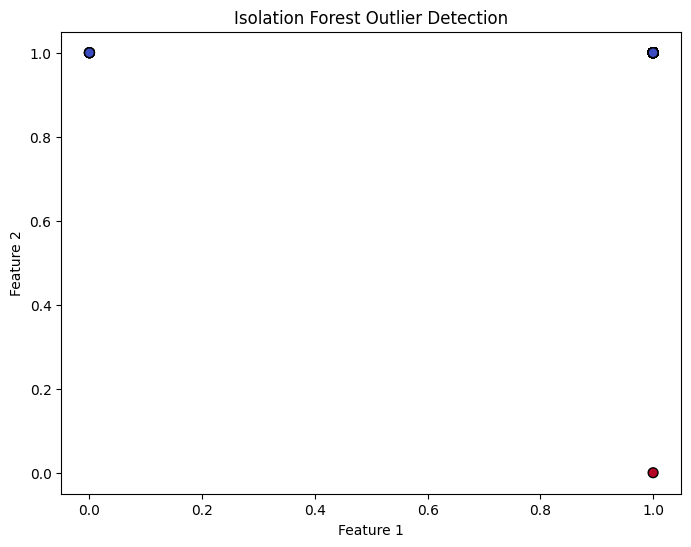

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called df

# Step 1: Select a random sample of 1000 rows from the dataset
df_sample = df.sample(n=1000, random_state=42)

# Step 2: Select relevant columns for association rule mining
target_column = 'sentiment_score'
drop_columns = ['id', 'dateAdded', 'dateUpdated', 'reviews.text', 'reviews.username', 'reviews.date', 'reviews.dateSeen', 'reviews.sourceURLs', 'reviews.title', 'reviews.id']

# Prepare the feature matrix (X) and target vector (y)
X = df_sample.drop([target_column] + drop_columns, axis=1)  # Features excluding target and irrelevant columns
y = df_sample[target_column]  # Target column 'sentiment_score'

# Check the shape of X before imputation
print(f"Original shape of X: {X.shape}")

# Check for columns with all missing values before imputation
missing_cols = X.columns[X.isnull().all()]
print(f"Columns with all missing values: {missing_cols}")

# Impute missing values (optional)
imputer = SimpleImputer(strategy='most_frequent')  # Use most_frequent for categorical data

# Handle columns with all missing values before imputation
X_imputed = X.drop(columns=missing_cols)  # Drop columns with all NaNs before imputation
X_imputed = imputer.fit_transform(X_imputed)  # Impute only the non-NaN columns

# Add back the missing columns with NaN values after imputation
X_imputed_df = pd.DataFrame(X_imputed, columns=X.drop(columns=missing_cols).columns)
for col in missing_cols:
    X_imputed_df[col] = np.nan  # Add back missing columns with NaN or use 0/other default values

# Check if the number of columns matches now
print(f"Shape of X_imputed after adding missing columns: {X_imputed_df.shape}")

# Now check if there are any missing values
if X_imputed_df.isna().any().any():
    print("Missing values still present!")
else:
    print("No missing values.")

# Apply label encoding to categorical features for association rule mining
label_encoder = LabelEncoder()

# Apply encoding to categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Convert the data into a one-hot encoded format suitable for Isolation Forest
X_onehot = pd.get_dummies(X)

# Ensure all values are binary (0 or 1) for Isolation Forest
X_onehot = (X_onehot > 0).astype(int)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Assuming 5% of data are outliers

# Fit the model and predict outliers
outliers_iso = iso_forest.fit_predict(X_onehot)
outliers_iso = outliers_iso == -1  # Mark outliers as -1

# Display rows with outliers
outlier_rows_iso = df_sample[outliers_iso]
print("Outlier rows using Isolation Forest:")
print(outlier_rows_iso)

# Visualize the outliers
plt.figure(figsize=(8, 6))
plt.scatter(X_onehot.iloc[:, 0], X_onehot.iloc[:, 1], c=outliers_iso, cmap='coolwarm', edgecolors='k', s=50)
plt.title("Isolation Forest Outlier Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Combined Outlier Detection Results:
     Z-Score Outliers  IQR Outliers  Isolation Forest Outliers  LOF Outliers
0               False         False                      False         False
1               False          True                      False         False
2               False          True                      False         False
3               False         False                      False         False
4               False         False                      False         False
..                ...           ...                        ...           ...
995             False         False                      False         False
996             False          True                       True         False
997             False          True                       True          True
998             False         False                      False         False
999             False          True                      False          True

[1000 rows x 4 columns]


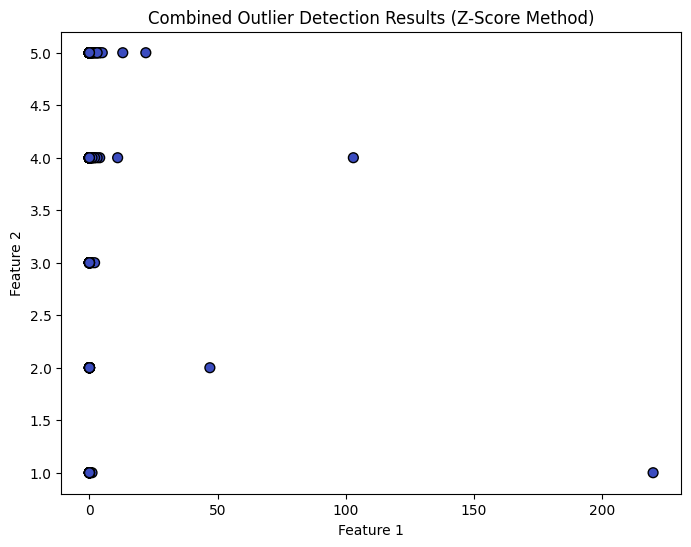

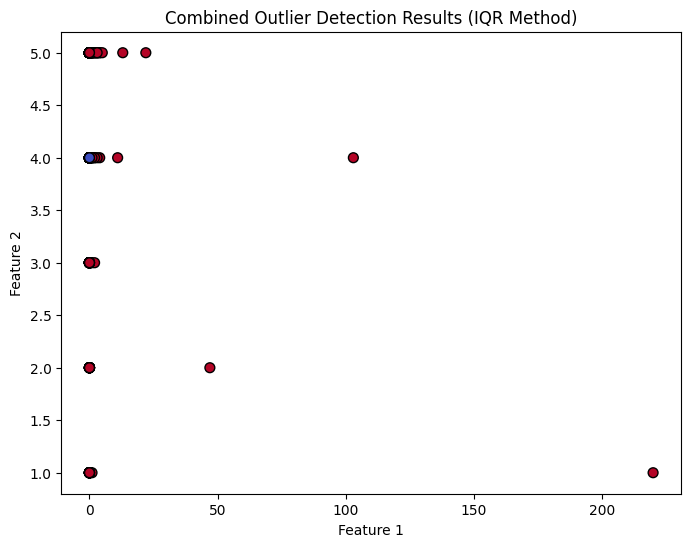

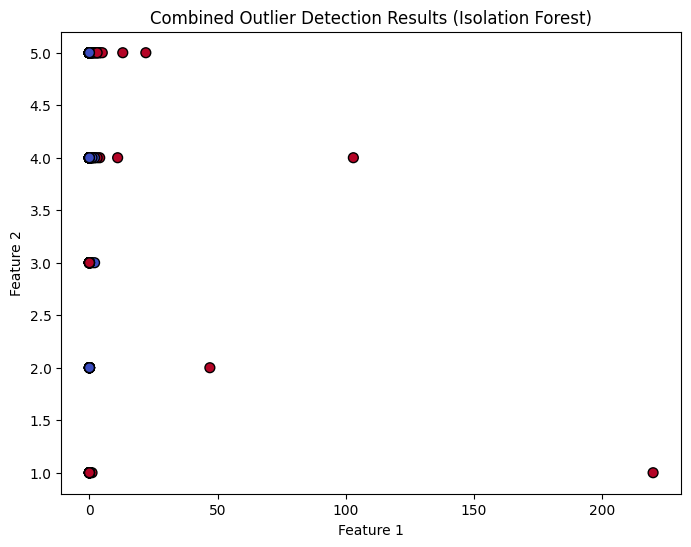

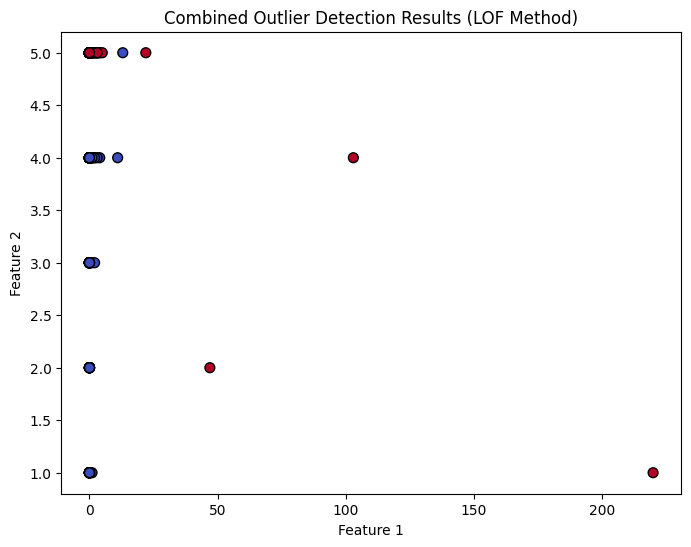

In [14]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming df_sample is already loaded and preprocessed

# Select numeric columns
X = df_sample[['reviews.numHelpful', 'reviews.rating', 'review_length', 'word_count', 'avg_word_length', 'sentiment_score']]

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # Use most frequent value for imputation
X_imputed = imputer.fit_transform(X)

# Convert imputed data back to DataFrame for easier manipulation
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Z-Score method
z_scores = np.abs(zscore(X_imputed_df))
threshold = 3
outliers_z = (z_scores > threshold).all(axis=1)  # Outliers in all columns

# IQR method
Q1 = X_imputed_df.quantile(0.25)
Q3 = X_imputed_df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((X_imputed_df < (Q1 - 1.5 * IQR)) | (X_imputed_df > (Q3 + 1.5 * IQR)))

# Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers_iso = iso_forest.fit_predict(X_imputed_df)
outliers_iso = outliers_iso == -1  # Mark outliers as -1

# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outliers_lof = lof.fit_predict(X_imputed_df)
outliers_lof = outliers_lof == -1  # Mark outliers as -1

# Combine the results from all methods
combined_outliers = pd.DataFrame({
    'Z-Score Outliers': outliers_z,
    'IQR Outliers': outliers_iqr.any(axis=1),
    'Isolation Forest Outliers': outliers_iso,
    'LOF Outliers': outliers_lof
})

# Display combined outlier results
print("Combined Outlier Detection Results:")
print(combined_outliers)

# Visualizing the results - Example with Z-Score outliers
plt.figure(figsize=(8, 6))
plt.scatter(X_imputed_df.iloc[:, 0], X_imputed_df.iloc[:, 1], c=combined_outliers['Z-Score Outliers'], cmap='coolwarm', edgecolors='k', s=50)
plt.title("Combined Outlier Detection Results (Z-Score Method)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Visualizing the IQR method outliers
plt.figure(figsize=(8, 6))
plt.scatter(X_imputed_df.iloc[:, 0], X_imputed_df.iloc[:, 1], c=combined_outliers['IQR Outliers'], cmap='coolwarm', edgecolors='k', s=50)
plt.title("Combined Outlier Detection Results (IQR Method)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Visualizing the Isolation Forest method outliers
plt.figure(figsize=(8, 6))
plt.scatter(X_imputed_df.iloc[:, 0], X_imputed_df.iloc[:, 1], c=combined_outliers['Isolation Forest Outliers'], cmap='coolwarm', edgecolors='k', s=50)
plt.title("Combined Outlier Detection Results (Isolation Forest)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Visualizing the LOF method outliers
plt.figure(figsize=(8, 6))
plt.scatter(X_imputed_df.iloc[:, 0], X_imputed_df.iloc[:, 1], c=combined_outliers['LOF Outliers'], cmap='coolwarm', edgecolors='k', s=50)
plt.title("Combined Outlier Detection Results (LOF Method)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [13]:
pip install pycaret


In [17]:
pip install --upgrade pycaret


In [23]:
import pycaret
from pycaret.classification import *
import pandas as pd

# Load the dataset
df = pd.read_csv('cleaned_amazon_review_with_sentiment_score.csv')  # Replace with your actual file path

# Set up the classification experiment (using 'Sentiment' as target column)
exp = setup(data=df, target='Sentiment',
            categorical_features=['brand', 'manufacturer', 'categories', 'primaryCategories'],  # Add other categorical features
            numeric_features=['reviews.rating', 'review_length', 'word_count', 'avg_word_length', 'sentiment_score'],
            session_id=123)  # Set a random seed for reproducibility

# Compare different models and select the best one
best_model = compare_models()

# Train the selected model
final_model = create_model(best_model)

# Evaluate the model
evaluate_model(final_model)

# Save the trained model for future use
save_model(final_model, 'best_sentiment_model')

# Make predictions using the trained model
predictions = predict_model(final_model, data=df)


,Description,Value
0,Session id,123
1,Target,Sentiment
2,Target type,Multiclass
3,Target mapping,"Negative: 0, Neutral: 1, Positive: 2"
4,Original data shape,"(28332, 30)"
5,Transformed data shape,"(28332, 43)"
6,Transformed train set shape,"(19832, 43)"
7,Transformed test set shape,"(8500, 43)"
8,Numeric features,5
9,Categorical features,4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.2980
dummy,Dummy Classifier,0.8545,0.5000,0.8545,0.7302,0.7875,0.0000,0.0000,0.3310


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


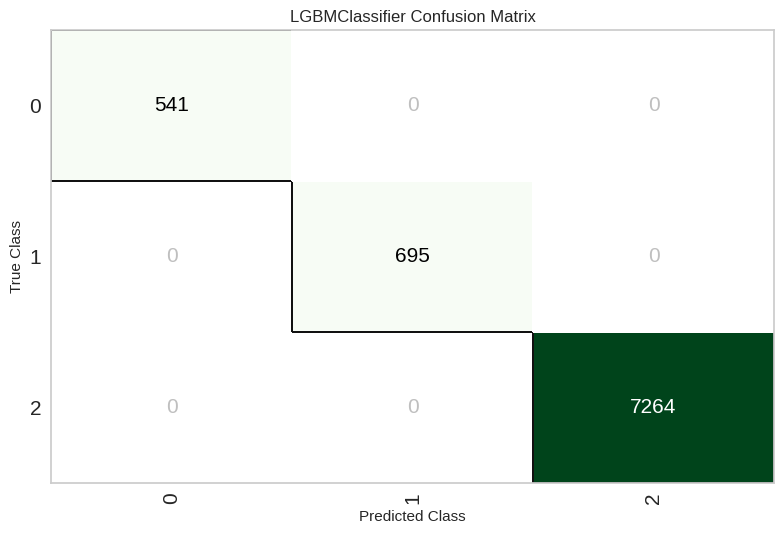

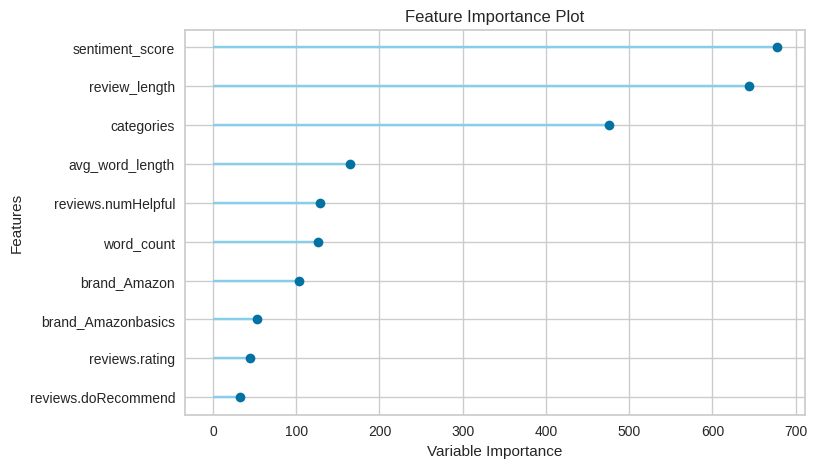

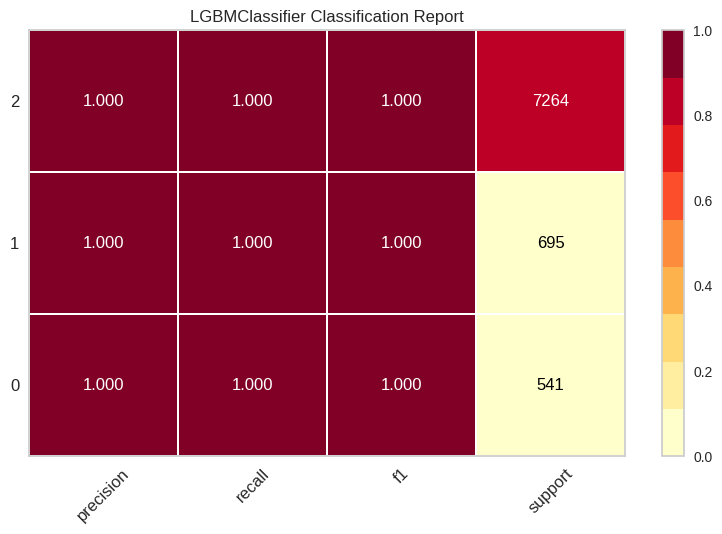

In [24]:
# Assuming you have already trained the model `final_model`

# Confusion Matrix (For Multiclass Classification)
from pycaret.classification import plot_model

# Plot Confusion Matrix for multiclass classification
plot_model(final_model, plot='confusion_matrix')

# Feature Importance (For Multiclass Classification)
plot_model(final_model, plot='feature')

# Classification Report (For Multiclass Classification)
plot_model(final_model, plot='class_report')


In [27]:
# Predict using the trained model
predictions = predict_model(final_model, data=df)
print(predictions.head())


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


                     id             dateAdded           dateUpdated  \
0  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
1  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
2  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
3  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
4  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   

                                                name                  asins  \
0  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
1  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
2  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
3  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
4  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   

          brand                                         categories  \
0  Amazonbasics  AA,AAA,Heal

# **DEEP LEARNING**

In [20]:
pip install tensorflow


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,347 (36.51 KB)

 Trainable params: 9,347 (36.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8135 - loss: 0.7230 - val_accuracy: 0.9337 - val_loss: 0.2057
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9420 - loss: 0.1760 - val_accuracy: 0.9561 - val_loss: 0.1226
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9633 - loss: 0.1088 - val_accuracy: 0.9698 - val_loss: 0.0875
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9724 - loss: 0.0836 - val_accuracy: 0.9788 - val_loss: 0.0669
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9806 - loss: 0.0592 - val_accuracy: 0.9835 - val_loss: 0.0536
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9837 - loss: 0.0498 - val_accuracy: 0.9859 - val_loss: 0.0451
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9849 - loss: 0.0471 - val_accuracy: 0.9875 - val_loss: 0.0401
Epoch 8/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9870 - loss: 0.0397 - val_accuracy: 0.9890

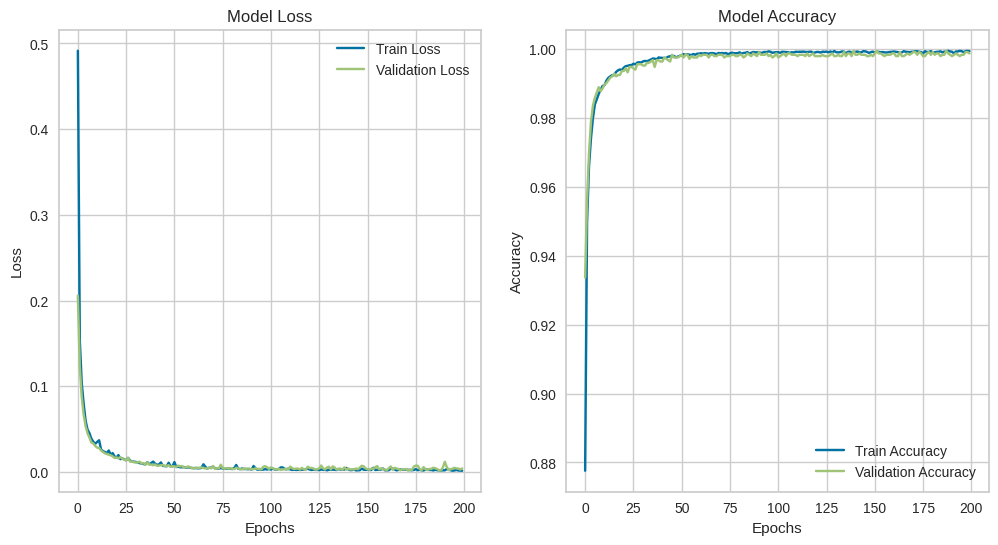

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


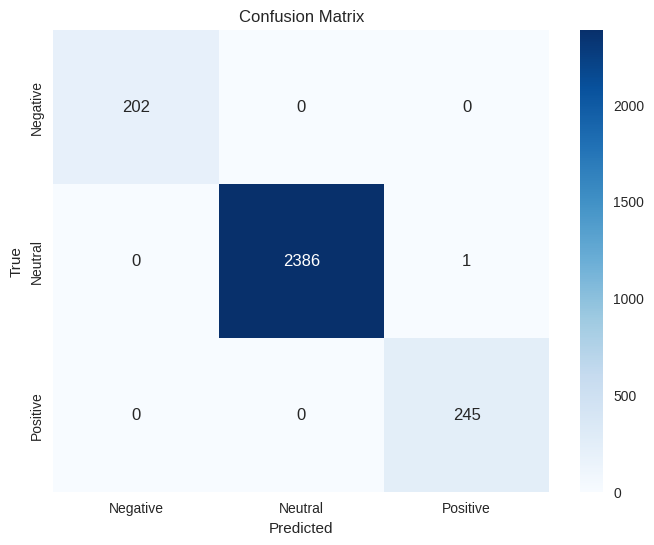

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9998 - loss: 9.9893e-04
Test Accuracy: 99.96%


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the dataset
df = pd.read_csv('cleaned_amazon_review_with_sentiment_score.csv')

# Drop irrelevant or non-numeric columns (these columns may contain string values)
df = df.drop(['reviews.text', 'reviews.title', 'reviews.date', 'reviews.sourceURLs',
              'reviews.id', 'reviews.username', 'dateAdded', 'dateUpdated', 'asins', 'keys',
              'imageURLs', 'sourceURLs', 'cleaned_reviews', 'manufacturerNumber'], axis=1)

# Handle missing values for categorical and numeric columns
categorical_columns = ['reviews.didPurchase', 'reviews.doRecommend']
numeric_columns = ['reviews.numHelpful', 'reviews.rating', 'review_length', 'word_count', 'avg_word_length', 'sentiment_score']

# Use SimpleImputer for categorical data (impute with the most frequent value)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Use SimpleImputer for numeric data (impute with mean)
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Perform one-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['brand', 'manufacturer', 'categories', 'primaryCategories'], drop_first=True)

# Ensure that only numeric columns are kept for the scaling process
x = df.select_dtypes(include=['float64', 'int64'])  # Only numeric columns for scaling

# Target variable: Sentiment (multiclass classification)
y = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else (0 if x == 'Negative' else 2))  # For multiclass classification

# Scale numerical features using StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Build the neural network model
model = models.Sequential()
model.add(layers.Dense(units=128, activation='relu', input_dim=x_train.shape[1]))  # First hidden layer with more neurons
model.add(layers.Dropout(0.2))  # Adding dropout to reduce overfitting
model.add(layers.Dense(units=64, activation='relu'))  # Second hidden layer
model.add(layers.Dense(units=3, activation='softmax'))  # Output layer for multiclass classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summarize the model
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=200, batch_size=400, validation_split=0.1)

# Plot Loss and Accuracy
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Make predictions on the test data
predictions = model.predict(x_test)
predicted_classes = predictions.argmax(axis=1)  # Convert predicted probabilities to classes

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
